In [102]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # KNN-K-ближайших соседей + задача классификаций
from sklearn.metrics import accuracy_score

In [103]:
df = pd.read_csv('gene_expression.csv')
df

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


<Axes: xlabel='Gene One', ylabel='Gene Two'>

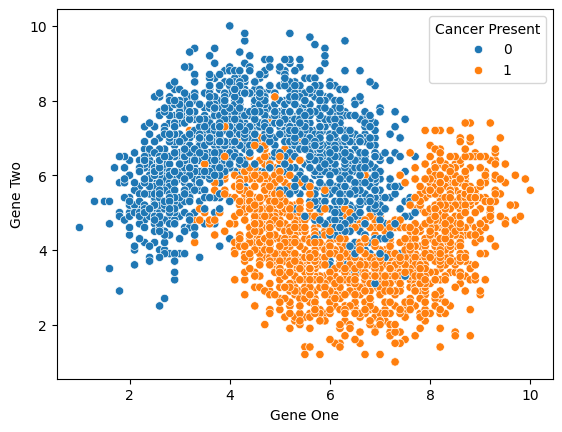

In [104]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present')

In [105]:
len(df)

3000

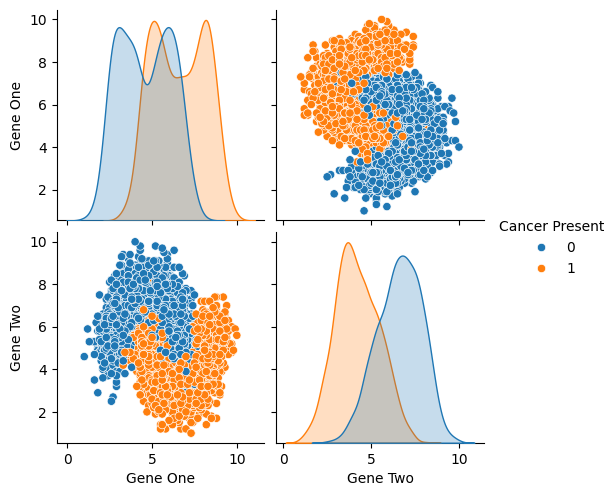

In [106]:
sns.pairplot(data=df, hue='Cancer Present')

In [107]:
# масштабирование здесь обязательно, поскольку данный метод работает с расстояниями

In [108]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [110]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [111]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [112]:
y_pred = knn_model.predict(scaled_X_test)

In [113]:
from sklearn.metrics import confusion_matrix, classification_report

In [114]:
confusion_matrix(y_test, y_pred)

array([[426,  44],
       [ 45, 385]])

In [115]:
len(y_test)

900

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



In [117]:
df['Cancer Present'].value_counts()

Cancer Present
1    1500
0    1500
Name: count, dtype: int64

In [118]:
# pipeline в Sklearn позволяет делать несколько шагов одновременно, такие как масштабирование признаков и работа с моделью

In [119]:
# определим оптимальное значение KNN
# сначала метод локтя

In [ ]:
test_error_rates = []

for i in range(1, 31):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(scaled_X_train, y_train)

    y_pred = knn_model.predict(scaled_X_test) # если масштабированная переменная сделана, то и в предикте тоже
    test_er = 1 - accuracy_score(y_test, y_pred)
    test_error_rates.append(test_er)

In [121]:
print(test_error_rates)

[0.09888888888888892, 0.09777777777777774, 0.07333333333333336, 0.0755555555555556, 0.07222222222222219, 0.06444444444444442, 0.06444444444444442, 0.061111111111111116, 0.05777777777777782, 0.06222222222222218, 0.061111111111111116, 0.06000000000000005, 0.061111111111111116, 0.06222222222222218, 0.05888888888888888, 0.05777777777777782, 0.05666666666666664, 0.05555555555555558, 0.05222222222222217, 0.053333333333333344, 0.054444444444444406, 0.05111111111111111, 0.054444444444444406, 0.054444444444444406, 0.05666666666666664, 0.05555555555555558, 0.05555555555555558, 0.05777777777777782, 0.05666666666666664, 0.05222222222222217]


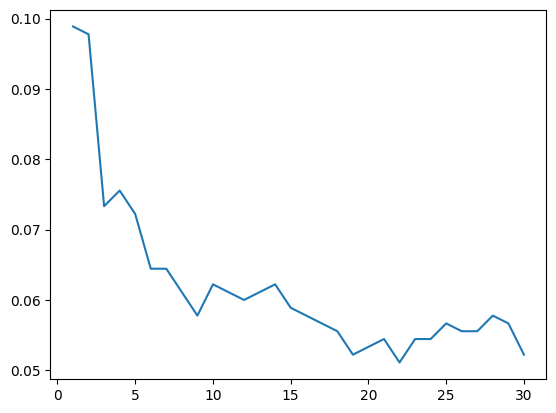

In [ ]:
# результат при одном разбиении. Точнее нужно сделать с помощью кросс-валидации
plt.plot(range(1, 31), test_error_rates)